## Table of Contents
### 1. Return on Investment = Number of impressions/8,000,000 * 100%
### 2. Celebrity 
- Sentiment Analysis
- Hashtags mentioned score: Top 10 celebrity hashtags
### 3. Brands & commercials sentiment analysis

# Importing libraries and data

In [2]:
#import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from collections import Counter

In [3]:
#load data
df = pd.read_csv("/Users/linhdo/Documents/University of Utah/Competition/Game Day Analytics/Dataset 2025/Clean_data2025(1).csv", low_memory = False)

In [4]:
df.head()

,created_at,text,conversation_id,reply_settings,edit_history_tweet_ids,lang,referenced_tweets,possibly_sensitive,id,author_id,...,hashtags,emojis,mentions,clean_text,tokens,sentiment,sentiment_category,has_mentions,popular_brand,brand_from_mentions
0,2025-02-10T03:16:57.000Z,RT @patriotslatam: Sólo hay uno como ÉL.\n\nAb...,1888789225308409951,everyone,['1888789225308409951'],es,"[{'type': 'retweeted', 'id': '1888782268186890...",False,1888789225308409951,206743570,...,NaN,NaN,"['@patriotslatam', '@TomBrady']",RT @patriotslatam: Sólo hay uno como ÉL. Abraz...,"['sólo', 'hay', 'uno', 'como']",0.000000,Neutral,True,Dunkin',[]
1,2025-02-10T03:16:49.000Z,RT @patriotslatam: Sólo hay uno como ÉL.\n\nAb...,1888789188876894329,everyone,['1888789188876894329'],es,"[{'type': 'retweeted', 'id': '1888782268186890...",False,1888789188876894329,282285390,...,NaN,NaN,"['@patriotslatam', '@TomBrady']",RT @patriotslatam: Sólo hay uno como ÉL. Abraz...,"['sólo', 'hay', 'uno', 'como']",0.000000,Neutral,True,Dunkin',[]
2,2025-02-10T03:16:48.000Z,THE ONLY GOAT. 🐐 @TomBrady\n\n#SuperBowl https...,1888789186284503124,everyone,['1888789186284503124'],en,NaN,False,1888789186284503124,246885450,...,['#SuperBowl'],['🐐'],['@TomBrady'],THE ONLY GOAT. 🐐 @TomBrady #SuperBowl,[],0.000000,Neutral,True,Dunkin',[]
3,2025-02-10T03:16:46.000Z,I love you @TomBrady,1888789179074793761,everyone,['1888789179074793761'],en,NaN,False,1888789179074793761,1921582838,...,NaN,NaN,['@TomBrady'],I love you @TomBrady,['love'],0.500000,Positive,True,Dunkin',[]
4,2025-02-10T03:16:45.000Z,RT @billboard: Ben Affleck Brings Back the Dun...,1888789174926319942,everyone,['1888789174926319942'],en,"[{'type': 'retweeted', 'id': '1888737296708472...",False,1888789174926319942,30152016,...,NaN,NaN,['@billboard'],RT @billboard: Ben Affleck Brings Back the Dun...,"['ben', 'affleck', 'brings', 'back', 'dunkings...",0.166667,Positive,True,Dunkin',[]


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69536 entries, 0 to 69535
Data columns (total 46 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   created_at                         69536 non-null  object 
 1   text                               69536 non-null  object 
 2   conversation_id                    69536 non-null  int64  
 3   reply_settings                     69536 non-null  object 
 4   edit_history_tweet_ids             69536 non-null  object 
 5   lang                               69536 non-null  object 
 6   referenced_tweets                  60362 non-null  object 
 7   possibly_sensitive                 69536 non-null  bool   
 8   id                                 69536 non-null  int64  
 9   author_id                          69536 non-null  int64  
 10  entities.annotations               45729 non-null  object 
 11  entities.mentions                  62144 non-null  obj

In [17]:
df.describe(include='all')

,created_at,text,conversation_id,reply_settings,edit_history_tweet_ids,lang,referenced_tweets,possibly_sensitive,id,author_id,...,hashtags,emojis,mentions,clean_text,tokens,sentiment,sentiment_category,has_mentions,popular_brand,brand_from_mentions
count,69536,69536,6.953600e+04,69536,69536,69536,60362,69536,6.953600e+04,6.953600e+04,...,27294,21880,62162,69472,69536,69536.000000,69536,69536,69536,69536
unique,7145,31626,NaN,5,62327,55,16953,2,NaN,NaN,...,3472,3819,14572,30476,23998,NaN,3,2,59,1
top,2025-02-10T03:15:02.000Z,RT @NFL: Gatorade bath in slo mo please\n\n📺: ...,NaN,everyone,['1888787551621681616'],en,"[{'type': 'retweeted', 'id': '1888787238063849...",False,NaN,NaN,...,['#SBLIX'],"['📺', '📱']",['@NFL'],RT @NFL: Gatorade bath in slo mo please 📺: #SB...,[],NaN,Neutral,True,Homes.com,[]
freq,141,1348,NaN,68842,17,51272,1348,68037,NaN,NaN,...,6775,3274,5568,1348,10569,NaN,40062,62162,5979,69536
mean,NaN,NaN,1.888446e+18,NaN,NaN,NaN,NaN,NaN,1.888785e+18,8.266552e+17,...,NaN,NaN,NaN,NaN,NaN,0.085458,NaN,NaN,NaN,NaN
std,NaN,NaN,1.027211e+16,NaN,NaN,NaN,NaN,NaN,8.909283e+12,7.503343e+17,...,NaN,NaN,NaN,NaN,NaN,0.271817,NaN,NaN,NaN,NaN
min,NaN,NaN,8.500303e+17,NaN,NaN,NaN,NaN,NaN,1.888649e+18,1.022100e+04,...,NaN,NaN,NaN,NaN,NaN,-1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,1.888782e+18,NaN,NaN,NaN,NaN,NaN,1.888786e+18,5.950873e+08,...,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,1.888787e+18,NaN,NaN,NaN,NaN,NaN,1.888788e+18,9.678690e+17,...,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,1.888788e+18,NaN,NaN,NaN,NaN,NaN,1.888789e+18,1.545173e+18,...,NaN,NaN,NaN,NaN,NaN,0.175000,NaN,NaN,NaN,NaN


# 1. ROI = Commercial cost/Number of engagement

## a. Top brands by impressions

In [24]:
# Calculate total impressions per brand
impressions_per_brand = df.groupby("brand")["public_metrics.impression_count"].sum().reset_index()

# Rename the column for clarity
impressions_per_brand.columns = ["Brand", "Total_Impressions"]

# Sort by highest impressions
impressions_per_brand = impressions_per_brand.sort_values(by="Total_Impressions", ascending=False)

# Display the top brands by impressions
print(impressions_per_brand.head(11))

# Save the top 10 brands to a CSV file
impressions_per_brand.head(11).to_csv("top_brands_by_impressions.csv", index=False)



             Brand  Total_Impressions
54        TurboTax           33386690
34             NFL           13314547
53            Tubi           11335784
9           Disney            3105821
23     Hims & Hers            2623543
19          Google            1814782
13         Dunkin'            1745475
24       Homes.com             941535
18         GoDaddy             757324
51       Taco Bell             725968
29  Little Caesars             611265


## b. Top brands by ROI

In [29]:
# Calculate ROI (Total Impressions / $8M)
ad_cost_per_ad = 8000000  # $8M per ad
impressions_per_brand["ROI"] = (impressions_per_brand["Total_Impressions"] / ad_cost_per_ad) * 100  # ROI in %

# Sort by highest ROI and display top 10 brands
top_11_brands_by_roi = impressions_per_brand.sort_values(by="ROI", ascending=False).head(11)
print(top_11_brands_by_roi)

# Save the top 10 brands to a CSV file
top_11_brands_by_roi.to_csv("top_11_brands_by_roi.csv", index = False)

             Brand  Total_Impressions         ROI
54        TurboTax           33386690  417.333625
34             NFL           13314547  166.431838
53            Tubi           11335784  141.697300
9           Disney            3105821   38.822763
23     Hims & Hers            2623543   32.794288
19          Google            1814782   22.684775
13         Dunkin'            1745475   21.818438
24       Homes.com             941535   11.769188
18         GoDaddy             757324    9.466550
51       Taco Bell             725968    9.074600
29  Little Caesars             611265    7.640812


# 2. Brands & commercials sentiment analysis

## Top 10 brands based on highest positive sentiment score

<Figure size 1200x600 with 0 Axes>

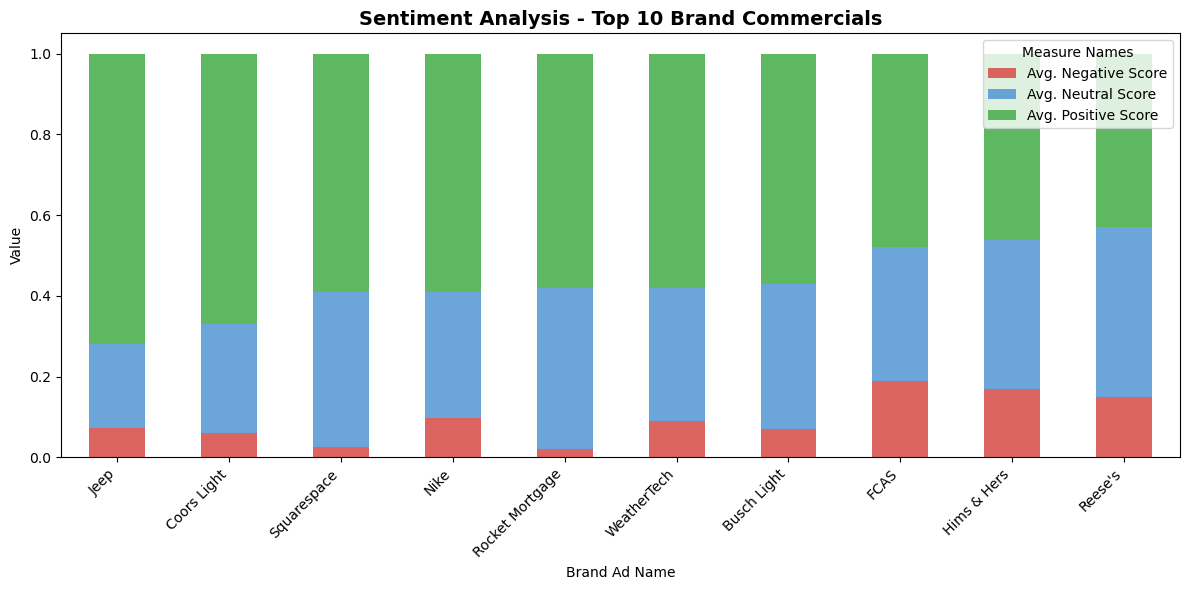

In [39]:
# Group by 'brand' and calculate sentiment proportions
sentiment_distribution = df.groupby("brand")["sentiment_category"].value_counts(normalize=True).unstack()

# Ensure all sentiment categories exist in the dataset
sentiment_distribution = sentiment_distribution.fillna(0)

# Rename columns for clarity
sentiment_distribution = sentiment_distribution.rename(columns={
    "Negative": "Avg. Negative Score",
    "Neutral": "Avg. Neutral Score",
    "Positive": "Avg. Positive Score"
})

# Reset index for visualization
sentiment_distribution = sentiment_distribution.reset_index()

# Sort brands by Positive Score in descending order and keep the top 10
top_10_brands = sentiment_distribution.sort_values(by="Avg. Positive Score", ascending=False).head(10)

# Save the top 10 brands to a CSV file
top_10_brands.head(10).to_csv("top_10_brands_sentiment_analysis.csv", index = False)

# Define pastel color palette
pastel_colors = ["#D9534F", "#5B9BD5", "#4CAF50"]  # Light Red, Light Blue, Light Green

# Plot stacked bar chart for top 10 brands with pastel colors
plt.figure(figsize=(12, 6))
top_10_brands.set_index("brand").plot(kind="bar", stacked=True, figsize=(12, 6), 
                                      color=pastel_colors, alpha=0.9)

plt.title("Sentiment Analysis - Top 10 Brand Commercials", fontsize=14, fontweight="bold")
plt.xlabel("Brand Ad Name")
plt.ylabel("Value")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Measure Names")
plt.tight_layout()

# Show the plot
plt.show()


<Figure size 1200x600 with 0 Axes>

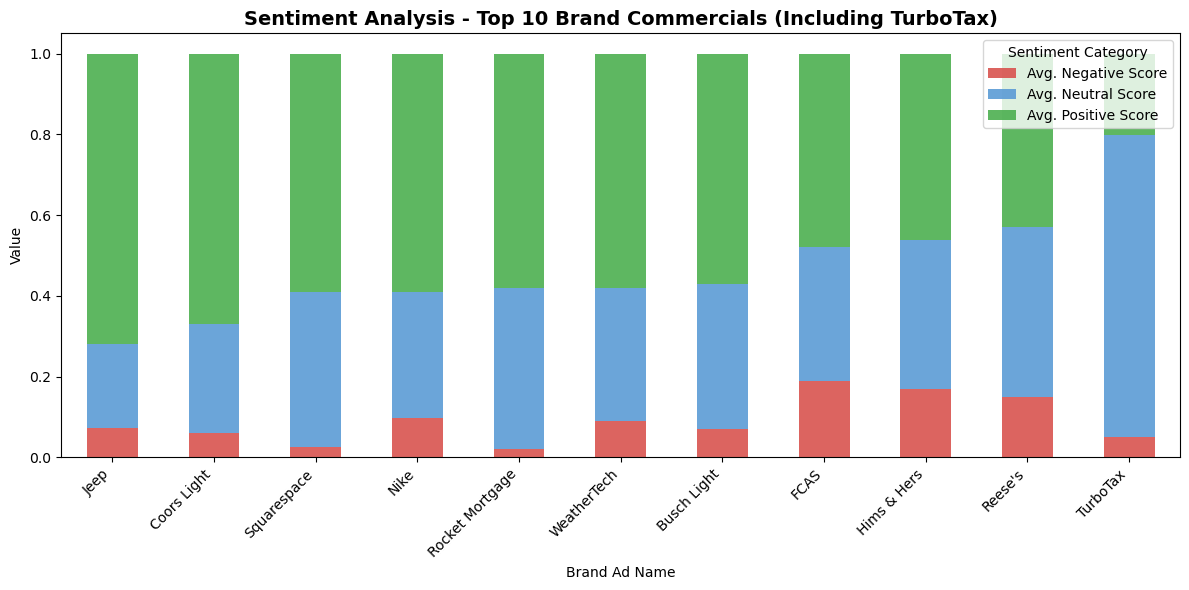

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

# Group by 'brand' and calculate sentiment proportions
sentiment_distribution = df.groupby("brand")["sentiment_category"].value_counts(normalize=True).unstack()

# Ensure all sentiment categories exist in the dataset
sentiment_distribution = sentiment_distribution.fillna(0)

# Rename columns for clarity
sentiment_distribution = sentiment_distribution.rename(columns={
    "Negative": "Avg. Negative Score",
    "Neutral": "Avg. Neutral Score",
    "Positive": "Avg. Positive Score"
})

# Reset index for visualization
sentiment_distribution = sentiment_distribution.reset_index()

# Sort brands by Positive Score in descending order and keep the top 10
top_10_brands = sentiment_distribution.sort_values(by="Avg. Positive Score", ascending=False).head(10)

# Ensure TurboTax is in the top 10 (if it's not already)
if 'TurboTax' not in top_10_brands['brand'].values:
    turbotax_sentiment = sentiment_distribution[sentiment_distribution['brand'] == 'TurboTax']
    top_10_brands = pd.concat([top_10_brands, turbotax_sentiment]).drop_duplicates(subset=['brand'])

# Save the updated sentiment analysis to a CSV file
top_10_brands.to_csv("top_10_brands_sentiment_analysis_with_turbotax.csv", index=False)

# Define pastel color palette
pastel_colors = ["#D9534F", "#5B9BD5", "#4CAF50"]  # Light Red, Light Blue, Light Green

# Plot stacked bar chart for top 10 brands with pastel colors
plt.figure(figsize=(12, 6))
top_10_brands.set_index("brand").plot(kind="bar", stacked=True, figsize=(12, 6),
                                      color=pastel_colors, alpha=0.9)

plt.title("Sentiment Analysis - Top 10 Brand Commercials (Including TurboTax)", fontsize=14, fontweight="bold")
plt.xlabel("Brand Ad Name")
plt.ylabel("Value")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Sentiment Category")
plt.tight_layout()

# Show the plot
plt.show()


# 3. Celebrity 

## Most mentioned celebrity

### Manual extract of celebrity data from mentions column

In [20]:
# Extracting usernames from mentions column
df['mentions'] = df['mentions'].apply(lambda x: eval(x) if isinstance(x, str) else x)  # Convert string representation to list
all_mentions = [mention for sublist in df['mentions'].dropna() for mention in sublist]  # Flatten list
top_mentions = Counter(all_mentions).most_common(100)    # Get top 50-70 mentioned accounts

# Convert to DataFrame for better visualization
top_mentions_df = pd.DataFrame(top_mentions, columns=['Account', 'Count'])
print(top_mentions_df)

            Account  Count
0              @NFL   7382
1    @MichelobULTRA   3758
2         @TomBrady   3658
3             @LAYS   2350
4     @budweiserusa   1599
..              ...    ...
95        @JTown604    101
96     @EndWokeness    101
97  @JerseyVegas369    100
98          @reeses     99
99        @jappleby     97

[100 rows x 2 columns]


In the above table, the celebrities that may attend SuperBowl Commercials are:
- TomBrady: Duracell & No Reason to Hate - NFL player
- @PatrickMahomes – NFL player Patrick Mahomes
- @DezBryant – Former NFL player Dez Bryant
- SnoopDog: What's up with hate - No Reason to Hate
- ElonMusk: does not play in the commercial but mentioned due to partnership between T-Mobile and Starlink
  
- Donnie Wahlberg: Dunkin
- Rob Gronkowski: Tostitos
- Kendrick Lamar: play haft-time show
- Lady Gaga: Filmed a special segment with Fox hosts, though specific details about the content were not widely publicized.
- Taylor Swift: While she did not appear in a commercial, her relationship with Travis Kelce was a topic of discussion during the Super Bowl, with fans expressing mixed reactions to her presence at the game. 

In [41]:
# List of usernames you want to keep
selected_usernames = ['@TomBrady', '@PatrickMahomes', '@DezBryant', '@SnoopDogg', '@elonmusk', '@DonnieWahlberg', '@RobGronkowski', '@kendricklamar', '@ladygaga', '@taylorswift13']

# Filter the DataFrame to keep only the selected usernames
filtered_df = top_mentions_df[top_mentions_df['Account'].isin(selected_usernames)]

# Display the filtered results
print(filtered_df)

# Save to csv
filtered_df.to_csv("top_mentioned_celebrities.csv")

            Account  Count
2         @TomBrady   3658
10  @PatrickMahomes    566
28       @DezBryant    282
34        @elonmusk    245
46       @SnoopDogg    208
63  @DonnieWahlberg    147
65   @RobGronkowski    143
67   @kendricklamar    130
69        @ladygaga    123
77   @taylorswift13    114
